訓練データのデータ数は7134、変数は29種類です。
テストデータのデータ数は1794、変数は28種類です


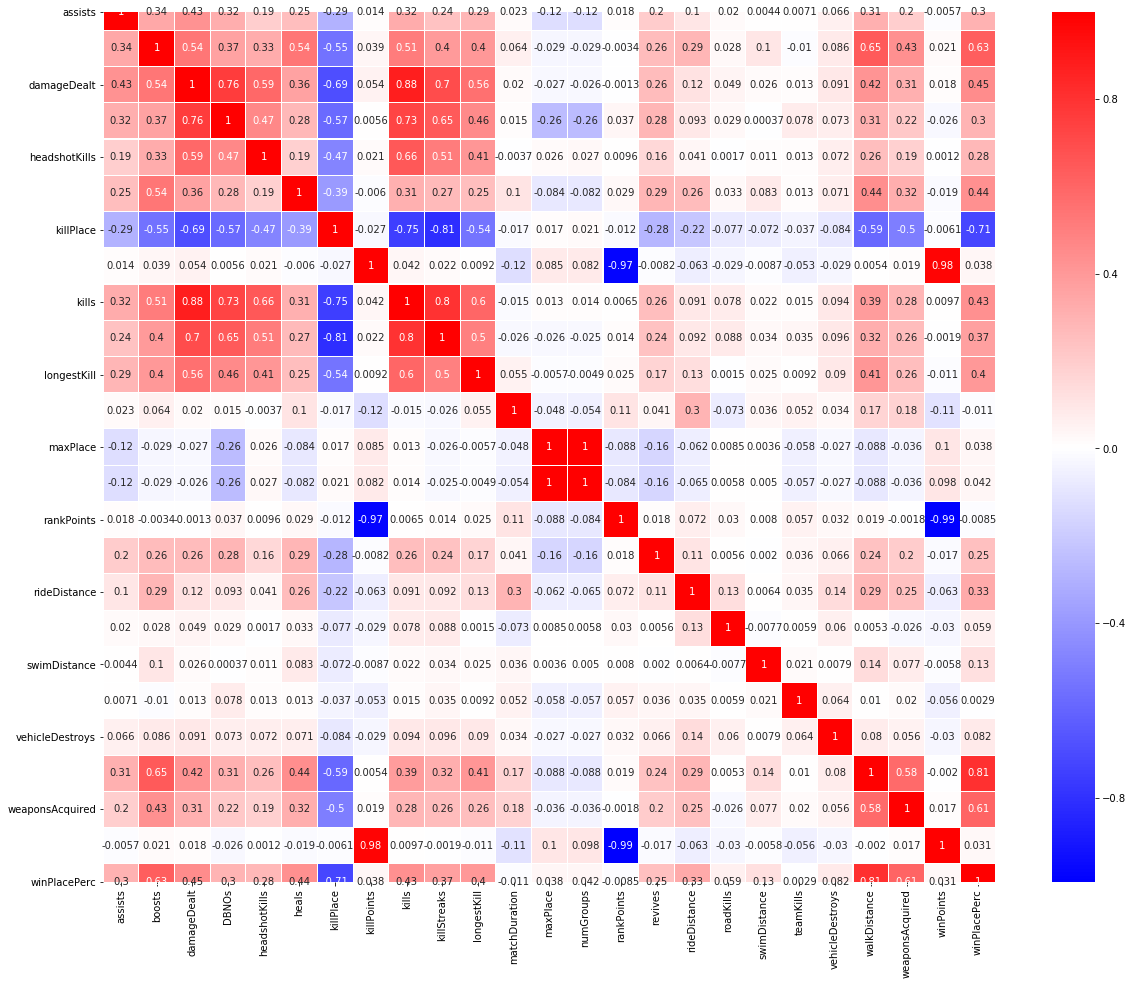

In [57]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

%precision 1

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv(rf"C:\Users\KIPPEI WATANABE\Downloads\pubg_train.csv")
df_test = pd.read_csv(rf"C:\Users\KIPPEI WATANABE\Downloads\pubg_test.csv")

print('訓練データのデータ数は{}、変数は{}種類です。'.format(df.shape[0], df.shape[1]))
print('テストデータのデータ数は{}、変数は{}種類です'.format(df_test.shape[0], df_test.shape[1]))

df.head(10)
df.columns
df.isnull().sum() 
df_test.isnull().sum()
sns.heatmap(df.corr(),annot=True,cmap='bwr',linewidths=0.1) 
fig=plt.gcf()
fig.set_size_inches(20,16)
plt.show()

In [59]:
matchtype = pd.concat([df['matchType'], df_test['matchType']])

matchtype_ohe = pd.get_dummies(matchtype)

matchtype_ohe_train = matchtype_ohe[:7134]
matchtype_ohe_test = matchtype_ohe[:1794]

df = pd.concat([df, matchtype_ohe_train], axis=1)
df_test = pd.concat([df_test, matchtype_ohe_test], axis=1)


df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPoints,winPlacePerc,crashfpp,duo,duo-fpp,normal-squad-fpp,solo,solo-fpp,squad,squad-fpp
0,2860d3f9ee4d4b,46f1b1c3bf0dae,25ade93a241f39,0,0,0.0,0,0,0,80,...,0,0.167487,0,1,0,0,0,0,0,0
1,0b88c47e54cdcc,5e92598b08bcb1,95125f5e05c653,0,2,359.0,4,0,0,5,...,1607,0.610492,0,0,1,0,0,0,0,0
2,8f086d61515bc4,ed4cfbc560f490,8a84da96d077c3,0,0,223.5,1,0,0,15,...,1736,0.666206,0,0,1,0,0,0,0,0
3,7c037ca62a38a4,d2ff4830704e19,a139eac809980a,0,0,128.1,0,0,0,50,...,1476,0.722956,0,0,0,0,0,0,0,1
4,82f08cde238c60,7c5002766d8c7a,e9d203a36b1d0a,0,0,200.0,2,0,0,36,...,0,0.204095,0,0,0,0,0,0,0,1


In [60]:
df_test.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,weaponsAcquired,winPoints,crashfpp,duo,duo-fpp,normal-squad-fpp,solo,solo-fpp,squad,squad-fpp
0,c9ce5e5749758a,d1d34623858d02,6533442a513d6f,0,0,100.0,1,1,0,38,...,1,0,0,1,0,0,0,0,0,0
1,262418e6a1fd89,f0290ae9582198,976f4ae3c91669,0,0,0.0,0,0,0,76,...,3,1639,0,0,1,0,0,0,0,0
2,1fdaad049557d9,d1d34623858d02,6533442a513d6f,1,0,57.0,1,0,0,71,...,4,0,0,0,1,0,0,0,0,0
3,cb1761d22b957e,77234d376925f9,efd749a746587e,0,0,0.0,0,0,1,72,...,2,1465,0,0,0,0,0,0,0,1
4,1b86424e60c2e8,19a7b7ce87c841,098d3f2da942e7,0,1,348.1,1,0,2,16,...,5,1398,0,0,0,0,0,0,0,1


In [61]:
df = df.ix[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,29,30,31,32,33,34,35,36,28]]


In [62]:
df_test = df_test.ix[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,28,29,30,31,32,33,34,35,27]]

In [63]:
print("df:\n",df.columns, "\n\n\n\ndf_test:\n",df_test.columns)

df:
 Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'crashfpp', 'duo', 'duo-fpp',
       'normal-squad-fpp', 'solo', 'solo-fpp', 'squad', 'squad-fpp',
       'winPlacePerc'],
      dtype='object') 



df_test:
 Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'crashfpp', 'duo', 'duo-f

In [64]:
df.isnull().sum()

Id                  0
groupId             0
matchId             0
assists             0
boosts              0
damageDealt         0
DBNOs               0
headshotKills       0
heals               0
killPlace           0
killPoints          0
kills               0
killStreaks         0
longestKill         0
matchDuration       0
matchType           0
maxPlace            0
numGroups           0
rankPoints          0
revives             0
rideDistance        0
roadKills           0
swimDistance        0
teamKills           0
vehicleDestroys     0
walkDistance        0
weaponsAcquired     0
winPoints           0
crashfpp            0
duo                 0
duo-fpp             0
normal-squad-fpp    0
solo                0
solo-fpp            0
squad               0
squad-fpp           0
winPlacePerc        0
dtype: int64

In [65]:
df_test.isnull().sum()

Id                  0
groupId             0
matchId             0
assists             0
boosts              0
damageDealt         0
DBNOs               0
headshotKills       0
heals               0
killPlace           0
killPoints          0
kills               0
killStreaks         0
longestKill         0
matchDuration       0
matchType           0
maxPlace            0
numGroups           0
rankPoints          0
revives             0
rideDistance        0
roadKills           0
swimDistance        0
teamKills           0
vehicleDestroys     0
walkDistance        0
weaponsAcquired     0
crashfpp            0
duo                 0
duo-fpp             0
normal-squad-fpp    0
solo                0
solo-fpp            0
squad               0
squad-fpp           0
winPoints           0
dtype: int64

In [66]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for column_name in df.columns:
    if df[column_name].dtype == object:
        df[column_name] = le.fit_transform(df[column_name])
    else:
        pass
for column_name in df_test.columns:
    if df_test[column_name].dtype == object:
        df_test[column_name] = le.fit_transform(df_test[column_name])
    else:
        pass

In [67]:
X = df.iloc[:, 0:36].values
y = df.iloc[:, 36].values

X_test = df_test.iloc[:, 0:].values

In [68]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

In [69]:
rfc = RandomForestRegressor(max_depth=10, min_samples_leaf=1, n_estimators=100, n_jobs=-1, random_state=42)
rfc.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [70]:
print('Train Score: {}'.format(round(rfc.score(X_train, y_train), 3)))
print(' Test Score: {}'.format(round(rfc.score(X_valid, y_valid), 3)))

Train Score: 0.958
 Test Score: 0.896


In [71]:
param_grid = {'max_depth': [3, 5, 7],
              'min_samples_leaf': [1, 2, 4]}

for max_depth in param_grid['max_depth']:
    for min_samples_leaf in param_grid['min_samples_leaf']:
        rfc_grid = RandomForestRegressor(max_depth=max_depth, min_samples_leaf=min_samples_leaf, 
                                            n_estimators=100, n_jobs=-1, random_state=42)
        rfc_grid.fit(X_train, y_train)
        print('max_depth: {}, min_samples_leaf: {}'.format(max_depth, min_samples_leaf))
        print('    Train Score: {}, Test Score: {}'.format(round(rfc_grid.score(X_train, y_train), 3),
                                                           round(rfc_grid.score(X_valid, y_valid), 3)))

max_depth: 3, min_samples_leaf: 1
    Train Score: 0.813, Test Score: 0.794
max_depth: 3, min_samples_leaf: 2
    Train Score: 0.813, Test Score: 0.794
max_depth: 3, min_samples_leaf: 4
    Train Score: 0.813, Test Score: 0.794
max_depth: 5, min_samples_leaf: 1
    Train Score: 0.87, Test Score: 0.844
max_depth: 5, min_samples_leaf: 2
    Train Score: 0.87, Test Score: 0.844
max_depth: 5, min_samples_leaf: 4
    Train Score: 0.87, Test Score: 0.844
max_depth: 7, min_samples_leaf: 1
    Train Score: 0.912, Test Score: 0.876
max_depth: 7, min_samples_leaf: 2
    Train Score: 0.911, Test Score: 0.877
max_depth: 7, min_samples_leaf: 4
    Train Score: 0.91, Test Score: 0.876


In [72]:
rfc_gs = GridSearchCV(RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42), param_grid, cv=5)
rfc_gs.fit(X, y)

print('Best Parameters: {}'.format(rfc_gs.best_params_))
print('CV Score: {}'.format(round(rfc_gs.best_score_, 3)))

Best Parameters: {'max_depth': 7, 'min_samples_leaf': 2}
CV Score: 0.89


In [73]:
rfc_pred = rfc.predict(X_test)
print(rfc_pred)

[0.2 0.2 0.2 ... 0.9 0.3 0.9]


In [74]:
submission = pd.read_csv(rf"C:\Users\KIPPEI WATANABE\Downloads\submission (1).csv")
submission

,winPlacePerc
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
1789,1.0
1790,1.0
1791,1.0
1792,1.0


In [75]:
submission["winPlacePerc"] = rfc_pred
submission

,winPlacePerc
0,0.158429
1,0.202146
2,0.246895
3,0.193665
4,0.546954
...,...
1789,0.604120
1790,0.384928
1791,0.863801
1792,0.330812


In [76]:
submission["winPlacePerc"] = round(submission, 1)

In [77]:
submission

,winPlacePerc
0,0.2
1,0.2
2,0.2
3,0.2
4,0.5
...,...
1789,0.6
1790,0.4
1791,0.9
1792,0.3


In [79]:
submission.to_csv(rf"C:\Users\KIPPEI WATANABE\Downloads\submission (1).csv")